In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
path_sf = rf'D:\OneDrive\Documentos\Materiais didáticos\MECAI\Dissertação\script\IBGE\BR_RG_Imediatas_2023\BR_RG_Imediatas_2023.shp'
geo_df = gpd.read_file(path_sf)
geo_df = geo_df.loc[geo_df['NM_UF'] == 'São Paulo']

In [3]:
dir_path = rf'D:\OneDrive\Documentos\Materiais didáticos\MECAI\Dissertação\script\Results'
name_path = 'results.csv'
complete_path = os.path.join(dir_path, name_path)

In [4]:
dir = rf'D:\OneDrive\Documentos\Materiais didáticos\MECAI\Dissertação\script\Dados Gerados Mestrado\Auxiliar'
df_dist_ZD_PA = pd.read_csv(os.path.join(dir, 'df_dist_ZD_PA.csv'))

In [5]:
def criar_excel(df, criar_novo=0, path=rf"C:\Users\rpafe\Desktop\dados_exportados.xlsx"):
    # Se criar_novo for 1 ou o arquivo não existir, cria um novo arquivo
    if criar_novo == 1 or not os.path.exists(path):
        mode = "w"
    else:
        mode = "a"

    with pd.ExcelWriter(path, mode=mode) as writer:
        # Obtendo o número da última sheet e incrementando (somente no modo 'a')
        if mode == "a":
            numsht = len(writer.book.sheetnames) + 1 if writer.book.sheetnames else 1
        else:
            numsht = 1  # Começa do primeiro se for um novo arquivo

        df.to_excel(writer, sheet_name=f"Sheet{numsht}")

    print(f"Arquivo Excel atualizado! {'Novo arquivo criado.' if criar_novo == 1 else 'Nova sheet adicionada.'}")


In [6]:
df = pd.read_csv(complete_path, encoding='latin1', sep=',')   

meses_dict = {
    0: '01-Jan', 1: '02-Fev', 2: '03-Mar', 3: '04-Abr', 
    4: '05-Mai', 5: '06-Jun', 6: '07-Jul', 7: '08-Ago', 
    8: '09-Set', 9: '10-Out', 10: '11-Nov', 11: '12-Dez'
}
df['Mes'] = df['Tempo'].apply(lambda x: meses_dict[x])

In [7]:
# df_fab = df.loc[df['Ref']=='Fabrica',:].groupby(['Ref', 'Origem', 'Mes', 'Abrv Var'])['Valor'].sum().unstack(level='Mes').\
#     applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)
# criar_excel(df_fab, criar_novo=1, path=rf"C:\Users\rpafe\Desktop\dados_exportados.xlsx")

# df_fab

In [8]:
df.loc[df['Ref'] == 'CD'].groupby(['Ref', 'uf_origem', 'uf_origem', 'cid_origem', 'Origem', 'Mes'])['z_w'].max().unstack(level='Mes')

,,,,Mes,01-Jan,02-Fev,03-Mar,04-Abr,05-Mai,06-Jun,07-Jul,08-Ago,09-Set,10-Out,11-Nov,12-Dez
Ref,uf_origem,uf_origem,cid_origem,Origem,,,,,,,,,,,,
CD,SP,SP,Osasco,CD_0006,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.loc[df['Ref'] == 'Fabrica', :].groupby(['Ref', 'Origem', 'Mes', 'Abrv Var'])['Valor'].sum().unstack(level='Mes').\
    applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)

C:\Users\rpafe\AppData\Local\Temp\ipykernel_408\2141650626.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)


Mes                      01-Jan  02-Fev  03-Mar  04-Abr  05-Mai  06-Jun  \
Ref     Origem Abrv Var                                                   
Fabrica F_0001 qac            0   5,670   5,670   5,670   5,670   5,670   
               qfra           0  18,269       0   3,152       0       0   
               qrf            0   5,670   5,670   5,670   5,670   5,670   
               sf        25,198  25,198  25,198  25,198  25,198  25,198   
               sfbc      12,599  25,198  19,528  17,010  11,340   5,670   
               sfrf      12,599       0   5,670   8,188  13,858  19,528   

Mes                      07-Jul  08-Ago  09-Set  10-Out  11-Nov  12-Dez  
Ref     Origem Abrv Var                                                  
Fabrica F_0001 qac        5,670   5,670   5,670   5,670   5,670   5,670  
               qfra           0   5,670  30,868   5,670   5,670   5,670  
               qrf        5,670   5,670   5,670   5,670   5,670   5,670  
               sf        25,198  25,198  25,198  25,198  25,198  25,198  
               sfbc           0       0  25,198  25,198  25,198  25,198  
               sfrf      25,198  25,198       0       0       0       0

In [10]:
df.loc[df['Ref'] == 'CD'].groupby(['Ref', 'Origem', 'uf_origem', 'cid_origem', 'Origem', 'Mes', 'Abrv Var'])['Valor'].sum().unstack(level='Mes').\
    applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)

C:\Users\rpafe\AppData\Local\Temp\ipykernel_408\1038743238.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)


Mes                                                 01-Jan   02-Fev   03-Mar  \
Ref Origem  uf_origem cid_origem Origem  Abrv Var                              
CD  CD_0006 SP        Osasco     CD_0006 qap             0   21,053   36,780   
                                         qrd             0        0   20,913   
                                         qrf             0    5,670    5,670   
                                         sc        144,111  172,487  179,998   
                                         scbp       66,149  100,378  103,869   
                                         scbt       49,612   34,600   45,643   
                                         scrd        9,450   14,393        0   
                                         scrf       18,900   23,116   30,486   

Mes                                                 04-Abr   05-Mai   06-Jun  \
Ref Origem  uf_origem cid_origem Origem  Abrv Var                              
CD  CD_0006 SP        Osasco     CD_0006 qap        37,260   30,440   58,684   
                                         qrd         1,036      696    6,520   
                                         qrf         5,670    5,670    5,670   
                                         sc        152,063  127,886  127,886   
                                         scbp      117,921  100,404   52,262   
                                         scbt        7,253    4,871   45,643   
                                         scrd            0        0        0   
                                         scrf       26,889   22,611   29,981   

Mes                                                 07-Jul   08-Ago   09-Set  \
Ref Origem  uf_origem cid_origem Origem  Abrv Var                              
CD  CD_0006 SP        Osasco     CD_0006 qap        39,238   49,258   32,029   
                                         qrd         6,520    5,111    6,520   
                                         qrf         5,670    5,670    5,670   
                                         sc        147,332  144,068  170,723   
                                         scbp       64,337   66,392   75,806   
                                         scbt       45,643   35,774   45,643   
                                         scrd            0        0        0   
                                         scrf       37,352   41,903   49,274   

Mes                                                 10-Out   11-Nov   12-Dez  
Ref Origem  uf_origem cid_origem Origem  Abrv Var                             
CD  CD_0006 SP        Osasco     CD_0006 qap        39,973   49,221   37,719  
                                         qrd         6,520    3,190        1  
                                         qrf         5,670    5,670    5,670  
                                         sc        189,434  168,921  131,211  
                                         scbp       87,146   89,238   79,518  
                                         scbt       45,643   22,329        7  
                                         scrd            0        0        0  
                                         scrf       56,645   57,355   51,687

In [11]:
df.loc[df['Ref'] == 'PA'].groupby(['Ref', 'uf_origem', 'Mes', 'Abrv Var'])['Valor'].sum().unstack(level='Mes').\
    applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)

C:\Users\rpafe\AppData\Local\Temp\ipykernel_408\3704028293.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)


Mes                      01-Jan   02-Fev   03-Mar   04-Abr   05-Mai   06-Jun  \
Ref uf_origem Abrv Var                                                         
PA  SP        qaj        49,575   56,047   47,480   54,189   53,393   58,749   
              qrc        70,874   49,429   65,204   10,362    6,959   65,204   
              qrp        42,962   48,558   41,128   46,957   46,272   50,902   
              sp        596,000  560,135  525,358  545,025  561,386  547,018   
              spbj      297,600  262,606  251,906  234,977  212,024  211,959   
              sprc      298,400  297,529  273,453  310,048  349,361  335,059   

Mes                      07-Jul   08-Ago   09-Set   10-Out   11-Nov   12-Dez  
Ref uf_origem Abrv Var                                                        
PA  SP        qaj        55,183   54,396   48,348   45,659   53,430   53,581  
              qrc        65,204   51,105   65,204   65,204   31,899       10  
              qrp        47,810   47,135   41,886   39,557   46,285   46,419  
              sp        513,679  504,571  464,934  433,601  443,778  474,325  
              spbj      196,014  190,876  174,557  168,871  164,662  148,800  
              sprc      317,665  313,695  290,377  264,730  279,116  325,525

In [12]:
df.loc[df['Ref'] == 'PA'].groupby(['Ref', 'Origem', 'uf_origem', 'cid_origem', 'Origem', 'Mes'])['z_w'].max().unstack(level='Mes')

Mes                                            01-Jan  02-Fev  03-Mar  04-Abr  \
Ref Origem  uf_origem cid_origem      Origem                                    
PA  PA_0001 SP        Adamantina      PA_0001     1.0    -0.0    -0.0    -0.0   
    PA_0004 SP        Álvares Machado PA_0004     1.0    -0.0    -0.0    -0.0   
    PA_0005 SP        Americana       PA_0005     1.0     0.0     0.0     0.0   
    PA_0007 SP        Andradina       PA_0007     1.0    -0.0    -0.0    -0.0   
    PA_0009 SP        Araçatuba       PA_0009     1.0    -0.0    -0.0    -0.0   
...                                               ...     ...     ...     ...   
    PA_0099 SP        Penápolis       PA_0099     1.0    -0.0    -0.0    -0.0   
    PA_0100 SP        Pindamonhangaba PA_0100     1.0    -0.0    -0.0    -0.0   
    PA_0101 SP        Piracicaba      PA_0101     1.0    -0.0    -0.0    -0.0   
    PA_0103 SP        Pirapozinho     PA_0103     1.0    -0.0    -0.0    -0.0   
    PA_0104 SP        Pirassununga    PA_0104     1.0    -0.0    -0.0    -0.0   

Mes                                            05-Mai  06-Jun  07-Jul  08-Ago  \
Ref Origem  uf_origem cid_origem      Origem                                    
PA  PA_0001 SP        Adamantina      PA_0001    -0.0    -0.0    -0.0    -0.0   
    PA_0004 SP        Álvares Machado PA_0004    -0.0    -0.0    -0.0    -0.0   
    PA_0005 SP        Americana       PA_0005     0.0     0.0    -0.0    -0.0   
    PA_0007 SP        Andradina       PA_0007    -0.0    -0.0    -0.0    -0.0   
    PA_0009 SP        Araçatuba       PA_0009    -0.0    -0.0    -0.0    -0.0   
...                                               ...     ...     ...     ...   
    PA_0099 SP        Penápolis       PA_0099    -0.0    -0.0    -0.0    -0.0   
    PA_0100 SP        Pindamonhangaba PA_0100    -0.0    -0.0    -0.0    -0.0   
    PA_0101 SP        Piracicaba      PA_0101    -0.0    -0.0    -0.0    -0.0   
    PA_0103 SP        Pirapozinho     PA_0103    -0.0    -0.0    -0.0    -0.0   
    PA_0104 SP        Pirassununga    PA_0104    -0.0    -0.0    -0.0    -0.0   

Mes                                            09-Set  10-Out  11-Nov  12-Dez  
Ref Origem  uf_origem cid_origem      Origem                                   
PA  PA_0001 SP        Adamantina      PA_0001    -0.0    -0.0    -0.0    -0.0  
    PA_0004 SP        Álvares Machado PA_0004    -0.0    -0.0    -0.0    -0.0  
    PA_0005 SP        Americana       PA_0005    -0.0    -0.0     0.0    -0.0  
    PA_0007 SP        Andradina       PA_0007    -0.0    -0.0    -0.0    -0.0  
    PA_0009 SP        Araçatuba       PA_0009    -0.0    -0.0    -0.0    -0.0  
...                                               ...     ...     ...     ...  
    PA_0099 SP        Penápolis       PA_0099    -0.0    -0.0    -0.0    -0.0  
    PA_0100 SP        Pindamonhangaba PA_0100    -0.0    -0.0    -0.0    -0.0  
    PA_0101 SP        Piracicaba      PA_0101    -0.0    -0.0    -0.0    -0.0  
    PA_0103 SP        Pirapozinho     PA_0103    -0.0    -0.0    -0.0    -0.0  
    PA_0104 SP        Pirassununga    PA_0104    -0.0    -0.0    -0.0    -0.0  

[72 rows x 12 columns]

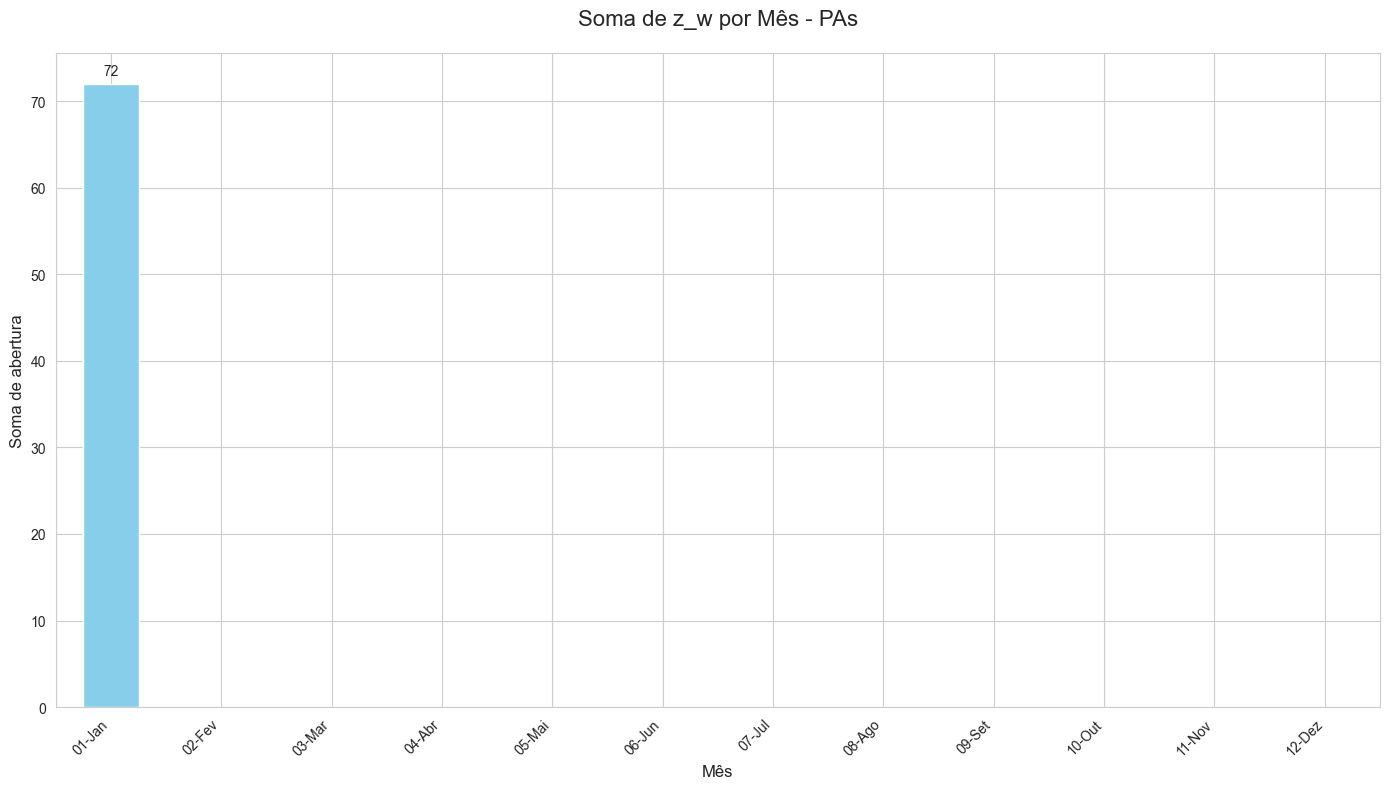

In [13]:
df_pa = df.loc[df['Ref'] == 'PA']

# Agrupar por mês ('Mes') e calcular a soma da coluna 'z_w' para cada mês
monthly_data = df_pa[['Mes', 'Origem', 'z_w']].drop_duplicates().groupby(['Mes'])['z_w'].sum()

# Supondo que 'df' seja o seu DataFrame carregado

df_pa = df.loc[df['Ref'] == 'PA']

# Agrupar por mês ('Mes') e calcular a soma da coluna 'z_w' para cada mês
monthly_data = df_pa[['Mes', 'Origem', 'z_w']].drop_duplicates().groupby(['Mes'])['z_w'].sum()

# Criar a figura e os eixos do gráfico
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Plotar o gráfico de barras
ax = monthly_data.plot(kind='bar', color='skyblue')

# Adicionar rótulos de dados
for p in ax.patches:
    if p.get_height() > 0:
        # Adiciona o rótulo acima da barra
        ax.annotate(f'{p.get_height():.0f}',  # Formata o valor (opcional: .2f para 2 casas decimais)
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),  # Deslocamento vertical do texto (ajuste conforme necessário)
                textcoords='offset points')

# Definir o título do gráfico, rótulos dos eixos e outras configurações
plt.title('Soma de z_w por Mês - PAs', fontsize=16, pad=20)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Soma de abertura', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()

# Exibir o gráfico
plt.show()

In [14]:
df_plot = df.loc[df['Ref']!='Fabrica', ['Ref', 'Origem', 'lat_origem', 'lon_origem', 'uf_origem', 'cid_origem', 'z_w']].drop_duplicates()
df_plot = df_plot.reset_index(drop=True)
df_cidades = pd.read_csv(rf'D:\OneDrive\Documentos\Materiais didáticos\MECAI\Dissertação\script\Dados Gerados Mestrado\Auxiliar\df_cluster_pa_cities.csv',\
                          encoding='utf-8', sep=',', )
df_cidades = df_cidades.loc[~df_cidades['nome_cidade'].isin(df_plot['cid_origem'].unique()), :].drop_duplicates().reset_index(drop=True)
df_cidades = df_cidades.rename(columns={'nome_cidade': 'cid_origem', 'latitude_cidade': 'lat_origem', 'longitude_cidade': 'lon_origem'})

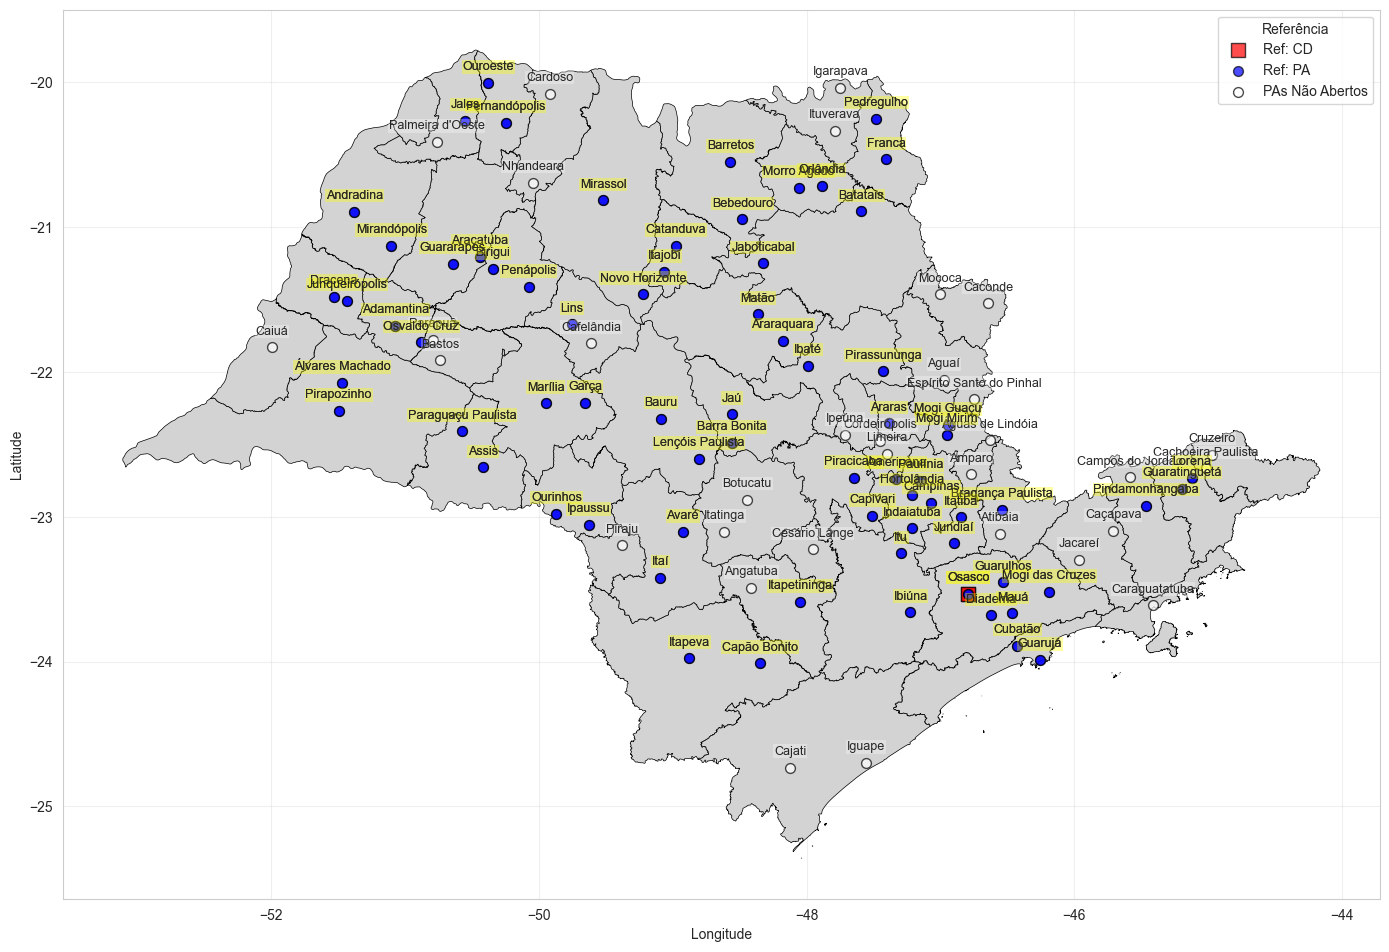

In [15]:
import matplotlib.pyplot as plt

def plotar_grafico(df, df_cidades):
    # Configurações de estilo
    ref_config = {
        'CD': {'color': 'red', 'marker': 's', 'size': 100, 'label_color': 'yellow'},
        'PA': {'color': 'blue', 'marker': 'o', 'size': 50, 'label_color': 'yellow'},
        # Padrão para Refs não especificadas
        'default': {'color': 'gray', 'marker': 'o', 'size': 50, 'label_color': 'yellow'}
    }
    
    # Criar figura
    fig, ax = plt.subplots(figsize=(14, 12))
    geo_df.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5)
    
    # Lista para armazenar handles da legenda
    legend_handles = []
    
    def plot_group(data, is_city=False):
        for ref, group in data.groupby('Ref' if not is_city else 'cid_origem'):
            config = ref_config.get(ref, ref_config['default']) if not is_city else {
                'color': 'white',
                'marker': 'o',
                'size': 50,
                'label_color': 'white'
            }
            
            # Criar scatter plot com label para legenda
            if not is_city:
                scatter = plt.scatter(
                    group['lon_origem'], 
                    group['lat_origem'],
                    c=config['color'],
                    marker=config['marker'],
                    s=config['size'],
                    edgecolor='black',
                    label=f'Ref: {ref}',
                    alpha=0.7
                )
                legend_handles.append(scatter)
            else:
                plt.scatter(
                    group['lon_origem'], 
                    group['lat_origem'],
                    c=config['color'],
                    marker=config['marker'],
                    s=config['size'],
                    edgecolor='black',
                    alpha=0.7
                )
            
            # Adicionar labels de texto
            for _, row in group.iterrows():
                plt.text(
                    row['lon_origem'],
                    row['lat_origem'] + 0.09,
                    row['cid_origem'],
                    fontsize=9,
                    ha='center',
                    bbox=dict(
                        facecolor=config['label_color'],
                        alpha=0.3 if is_city else 0.2,
                        edgecolor='none',
                        pad=0.5
                    )
                )
    
    # Plotar grupos
    plot_group(df_cidades, is_city=True)
    plot_group(df)
    
    # Adicionar entrada para cidades na legenda
    city_scatter = plt.scatter([], [], c='white', marker='o', s=50, 
                              edgecolor='black', label='PAs Não Abertos', alpha=0.7)
    legend_handles.append(city_scatter)
    
    # Configurações finais
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    # plt.title('CDs, PAs e PAs Não Abertos - Localização por Origem', fontsize=16, pad=20)
    
    # Criar legenda com os handles coletados
    plt.legend(handles=legend_handles, title='Referência', loc='best')
    
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Chamada da função
plotar_grafico(df_plot, df_cidades)

In [16]:
print(sorted(list(df_cidades.loc[~df_cidades['cid_origem'].isin(df_plot['cid_origem'].unique()), 'cid_origem'].unique())))

['Aguaí', 'Amparo', 'Angatuba', 'Atibaia', 'Bastos', 'Botucatu', 'Cachoeira Paulista', 'Caconde', 'Cafelândia', 'Caiuá', 'Cajati', 'Campos do Jordão', 'Caraguatatuba', 'Cardoso', 'Caçapava', 'Cesário Lange', 'Cordeirópolis', 'Cruzeiro', 'Espírito Santo do Pinhal', 'Igarapava', 'Iguape', 'Ipeúna', 'Itatinga', 'Ituverava', 'Jacareí', 'Limeira', 'Mococa', 'Nhandeara', "Palmeira d'Oeste", 'Parapuã', 'Piraju', 'Águas de Lindóia']


In [17]:
print(sorted(list(df_plot['cid_origem'].unique())))

['Adamantina', 'Americana', 'Andradina', 'Araraquara', 'Araras', 'Araçatuba', 'Assis', 'Avaré', 'Barra Bonita', 'Barretos', 'Batatais', 'Bauru', 'Bebedouro', 'Birigui', 'Bragança Paulista', 'Campinas', 'Capivari', 'Capão Bonito', 'Catanduva', 'Cubatão', 'Diadema', 'Dracena', 'Fernandópolis', 'Franca', 'Garça', 'Guararapes', 'Guaratinguetá', 'Guarujá', 'Guarulhos', 'Hortolândia', 'Ibaté', 'Ibiúna', 'Indaiatuba', 'Ipaussu', 'Itajobi', 'Itapetininga', 'Itapeva', 'Itatiba', 'Itaí', 'Itu', 'Jaboticabal', 'Jales', 'Jaú', 'Jundiaí', 'Junqueirópolis', 'Lençóis Paulista', 'Lins', 'Lorena', 'Marília', 'Matão', 'Mauá', 'Mirandópolis', 'Mirassol', 'Mogi Guaçu', 'Mogi Mirim', 'Mogi das Cruzes', 'Morro Agudo', 'Novo Horizonte', 'Orlândia', 'Osasco', 'Osvaldo Cruz', 'Ourinhos', 'Ouroeste', 'Paraguaçu Paulista', 'Paulínia', 'Pedregulho', 'Penápolis', 'Pindamonhangaba', 'Piracicaba', 'Pirapozinho', 'Pirassununga', 'Álvares Machado']


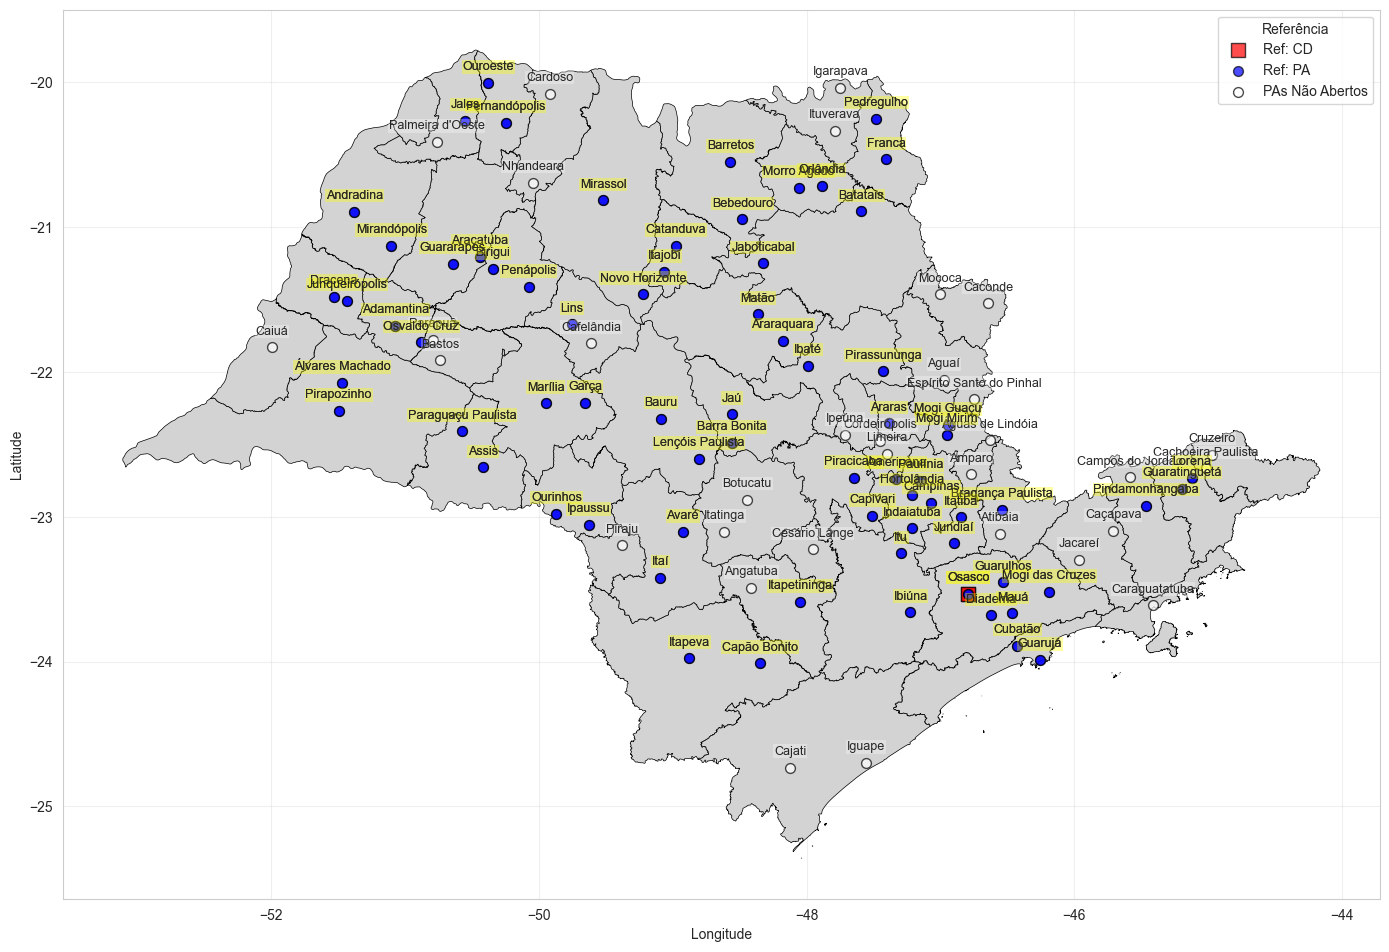

In [18]:
plotar_grafico(df_plot, df_cidades)

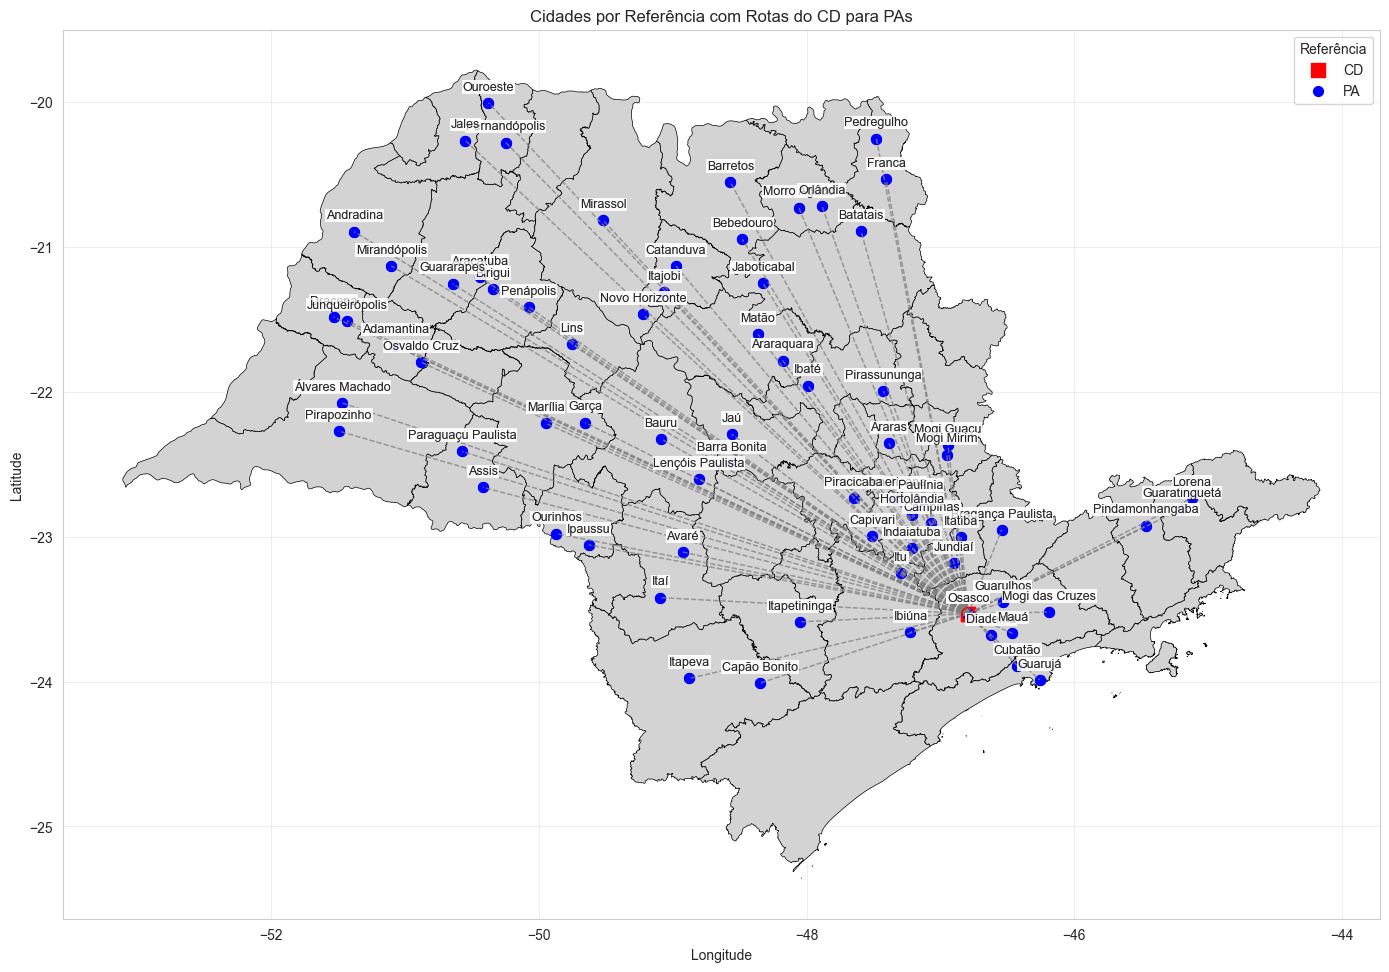

In [19]:
def plotar_grafico_traço(df):
    # Dicionário de cores para cada Ref
    ref_cores = {
        'CD': 'red',
        'PA': 'blue',
        # Adicione outras Refs e cores conforme necessário
    }
    
    # Dicionário de marcadores para cada Ref
    ref_markers = {
        'CD': 's',  # quadrado
        'PA': 'o',  # círculo
        # Adicione outros marcadores conforme necessário
    }

    ref_size = {
        'CD': 100,
        'PA': 50,
        # Adicione outros tamanhos conforme necessário
    }
    
    fig, ax = plt.subplots(figsize=(14, 12))
    geo_df.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5)
    
    # Encontrar as coordenadas do CD
    cd_data = df[df['Ref'] == 'CD']
    if not cd_data.empty:
        cd_lon = cd_data['lon_origem'].iloc[0]
        cd_lat = cd_data['lat_origem'].iloc[0]
    
    # Plotar cada grupo separadamente
    for ref, group in df.groupby('Ref'):
        scatter = plt.scatter(
            group['lon_origem'], 
            group['lat_origem'],
            c=ref_cores.get(ref, 'gray'),
            marker=ref_markers.get(ref, 'o'),
            s=ref_size.get(ref, 50),
            label=ref
        )
        
        # Adicionar rótulos das cidades
        for _, row in group.iterrows():
            plt.text(
                row['lon_origem'], 
                row['lat_origem'] + 0.09,  # Ajuste vertical para evitar sobreposição
                row['cid_origem'],          # Nome da cidade
                fontsize=9,                 # Tamanho da fonte
                ha='center',                 # Alinhamento horizontal
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=0.5)
            )
            
            # Desenhar linhas do CD para os PAs
            if ref == 'PA' and not cd_data.empty:
                plt.plot(
                    [cd_lon, row['lon_origem']],
                    [cd_lat, row['lat_origem']],
                    color='gray',
                    linestyle='--',
                    linewidth=1,
                    alpha=0.5
                )
    
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Cidades por Referência com Rotas do CD para PAs')
    plt.legend(title='Referência')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

plotar_grafico_traço(df_plot)

In [20]:
df_info_zd = df_dist_ZD_PA.iloc[:,1:5].rename(columns={'latitude_cidade': 'lat_zd', 'longitude_cidade': 'lon_zd'})
df_teste = df.loc[(df['Origem'].str.startswith('PA')) & (df['Destino'].str.startswith('ZD')) &
                (df['b_rota']==1), ['Origem', 'Destino', 'lat_origem', 'lon_origem']].drop_duplicates().reset_index(drop=True)
df_teste = pd.merge(df_teste, df_info_zd, left_on='Destino', right_on='ZD', how='left')

In [21]:
df_teste = pd.merge(df_teste, df_plot.loc[:, ['Origem', 'cid_origem']], left_on='Origem', right_on='Origem', how='left')

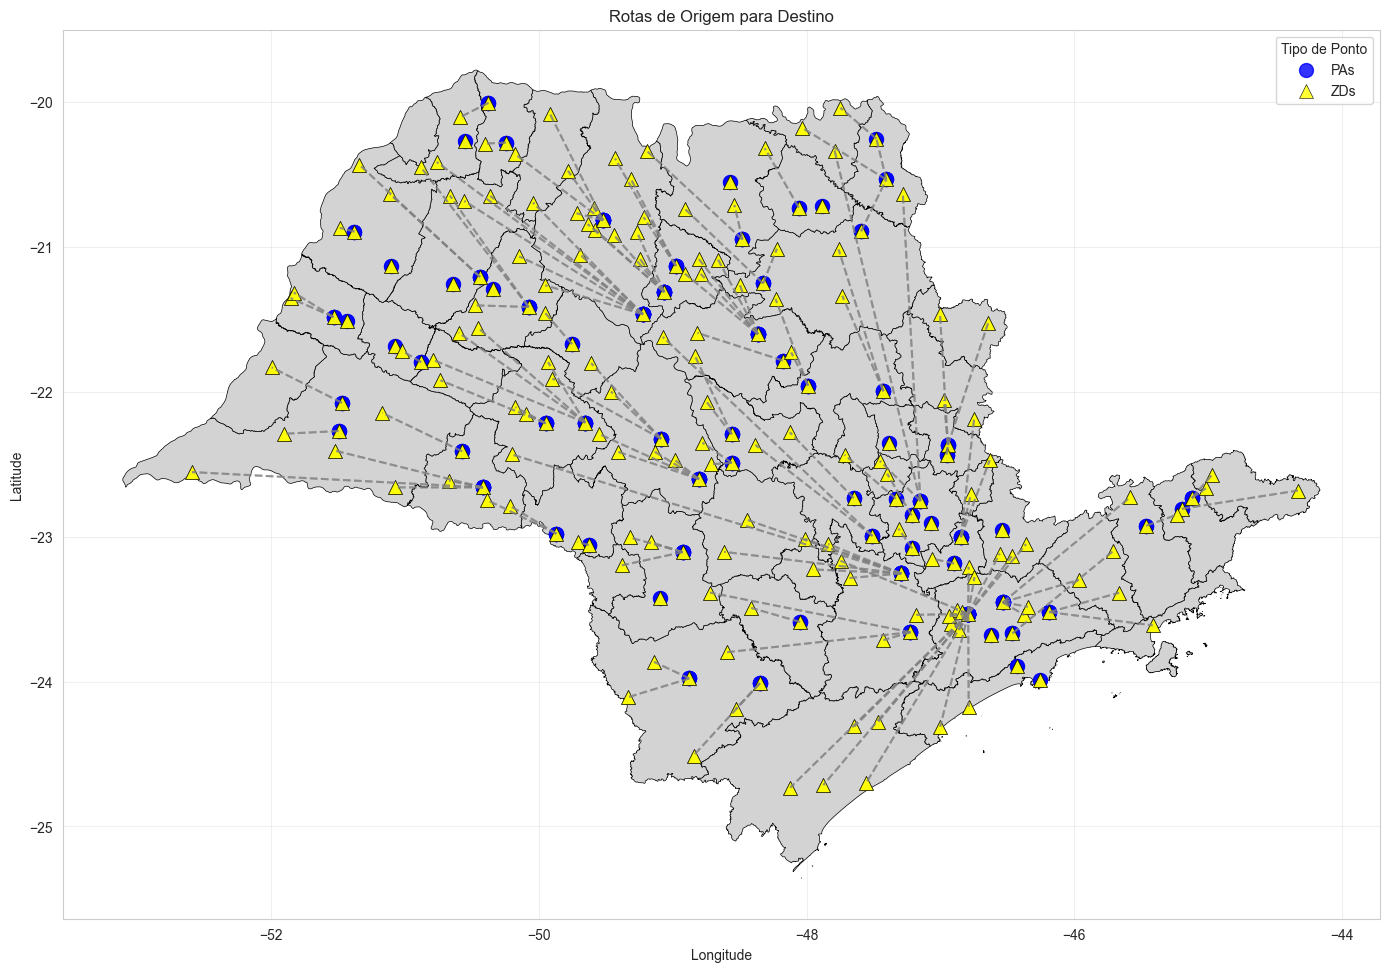

In [22]:
def plotar_grafico_traço(df):
    fig, ax = plt.subplots(figsize=(14, 12))
    geo_df.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5)
    
    # Plotar pontos de Origem (círculo azul)
    scatter_origem = plt.scatter(
        df['lon_origem'], 
        df['lat_origem'],
        c='blue',
        marker='o',
        s=100,
        label="PAs",
        alpha=0.8
    )
    
    # Plotar pontos de Destino (triângulo amarelo)
    scatter_destino = plt.scatter(
        df['lon_zd'], 
        df['lat_zd'],
        c='yellow',
        marker='^',
        s=100,
        label='ZDs',
        alpha=0.8,
        edgecolors='black',
        linewidth=0.5
    )
    
    # # Adicionar rótulos das origens (Origem + nome_cidade)
    # for _, row in df.iterrows():
    #     plt.text(
    #         row['lon_origem'], 
    #         row['lat_origem'] + 0.09,
    #         f"{row['Origem']}", # f"{row['Origem']} - {row['nome_cidade']}",
    #         fontsize=9,
    #         ha='center',
    #         bbox=dict(facecolor='lightblue', alpha=0.7, edgecolor='none', pad=0.5)
    #     )
    
    # # Adicionar rótulos dos destinos (Destino + cid_origem)
    # for _, row in df.iterrows():
    #     plt.text(
    #         row['lon_zd'], 
    #         row['lat_zd'] + 0.09,
    #         f"{row['Destino']}", # f"{row['Destino']} - {row['cid_origem']}"
    #         fontsize=9,
    #         ha='center',
    #         bbox=dict(facecolor='lightyellow', alpha=0.7, edgecolor='none', pad=0.5)
    #     )
    
    # Desenhar linhas tracejadas de origem para destino
    for _, row in df.iterrows():
        plt.plot(
            [row['lon_origem'], row['lon_zd']],
            [row['lat_origem'], row['lat_zd']],
            color='gray',
            linestyle='--',
            linewidth=1.5,
            alpha=0.6
        )
    
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Rotas de Origem para Destino')
    plt.legend(title='Tipo de Ponto')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Chamada da função
plotar_grafico_traço(df_teste)

In [23]:
df.loc[(df['Ref'] == 'PA') &
       (df['Abrv Var'] == 'qaj')].groupby(['Ref', 'Origem', 'uf_origem', 'cid_origem', 'Abrv Var'])['Valor'].sum().sort_values(ascending=False)

Ref  Origem   uf_origem  cid_origem       Abrv Var
PA   PA_0090  SP         Osasco           qaj         106381.0
     PA_0050  SP         Guarulhos        qaj          61452.0
     PA_0030  SP         Campinas         qaj          40017.0
     PA_0083  SP         Mogi das Cruzes  qaj          22623.0
     PA_0079  SP         Mauá             qaj          17772.0
                                                        ...   
     PA_0047  SP         Guararapes       qaj           1124.0
     PA_0059  SP         Itaí             qaj           1094.0
     PA_0057  SP         Ipaussu          qaj            980.0
     PA_0072  SP         Junqueirópolis   qaj            902.0
     PA_0093  SP         Ouroeste         qaj            533.0
Name: Valor, Length: 72, dtype: float64

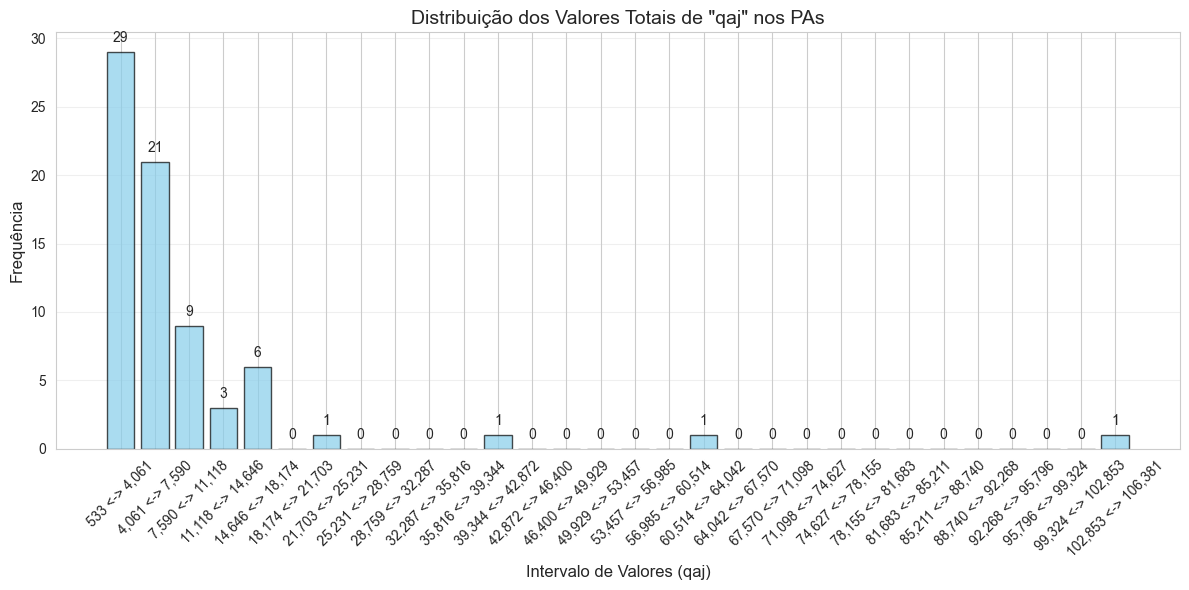

In [24]:
# Filtrar e preparar os dados (como antes)
dados_pa_qaj = df.loc[
    (df['Ref'] == 'PA') & 
    (df['Abrv Var'] == 'qaj')
].groupby(['Ref', 'Origem', 'uf_origem', 'cid_origem', 'Abrv Var'])['Valor'].sum().sort_values(ascending=False)

df_hist = dados_pa_qaj.reset_index()

# Criar bins (intervalos) manualmente para controle
valores = df_hist['Valor']
bins = 30  # Número de barras
hist, bin_edges = np.histogram(valores, bins=bins)

# Definir posições das barras com espaçamento
largura_barra = (bin_edges[1] - bin_edges[0]) * 0.8  # 80% da largura original
posicoes = bin_edges[:-1] + (bin_edges[1] - bin_edges[0]) * 0.1  # Centralizar + espaço

# Plotar as barras
plt.figure(figsize=(12, 6))
barras = plt.bar(
    posicoes, 
    hist, 
    width=largura_barra, 
    color='skyblue', 
    edgecolor='black',
    alpha=0.7
)

# Adicionar rótulos em cada barra
for barra, valor in zip(barras, hist):
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2,  # Posição X (centro da barra)
        altura + 0.5,                            # Posição Y (acima da barra)
        f'{int(valor)}',                         # Texto (valor)
        ha='center',                             # Alinhamento horizontal
        va='bottom',                             # Alinhamento vertical
        fontsize=10
    )

# Ajustar eixos e título
plt.xlabel('Intervalo de Valores (qaj)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title('Distribuição dos Valores Totais de "qaj" nos PAs', fontsize=14)
plt.xticks(posicoes, [f'{bin_edges[i]:,.0f} <-> {bin_edges[i+1]:,.0f}' for i in range(bins)], rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [25]:
df.loc[(df['Ref'] == 'CD') & (df['Destino'] == 'PA_0056')].groupby(['Ref', 'Origem', 'uf_origem', 'cid_origem', 'Origem', 'Mes', 'Abrv Var'])['Valor'].\
    sum().unstack(level='Mes').applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)

C:\Users\rpafe\AppData\Local\Temp\ipykernel_408\1107061188.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sum().unstack(level='Mes').applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)


,,,,,Mes,01-Jan,02-Fev,03-Mar,04-Abr,05-Mai,06-Jun,07-Jul,08-Ago,09-Set,10-Out,11-Nov,12-Dez
Ref,Origem,uf_origem,cid_origem,Origem,Abrv Var,,,,,,,,,,,,
CD,CD_0006,SP,Osasco,CD_0006,qap,0,0,0,0,0,0,0,788,0,0,"1,661","1,325"


In [26]:
df.loc[df['Origem'] == 'PA_0066'].groupby(['Ref', 'Origem', 'uf_origem', 'cid_origem', 'Mes', 'Abrv Var'])['Valor'].sum().unstack(level='Mes').\
    applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)

C:\Users\rpafe\AppData\Local\Temp\ipykernel_408\3642971027.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)


,,,,Mes
Ref,Origem,uf_origem,cid_origem,Abrv Var


In [27]:
df.loc[df['Origem'] == 'PA_0032'].groupby(['Ref', 'Origem', 'uf_origem', 'cid_origem', 'Mes', 'Abrv Var'])['Valor'].sum().unstack(level='Mes').\
    applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)

C:\Users\rpafe\AppData\Local\Temp\ipykernel_408\1091802412.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)


Mes                                         01-Jan 02-Fev 03-Mar 04-Abr  \
Ref Origem  uf_origem cid_origem   Abrv Var                               
PA  PA_0032 SP        Capão Bonito qaj         292    207    196    356   
                                   qrc           0      0  1,086      0   
                                   qrp         253    179    169    309   
                                   sp        2,800  2,772  1,659  1,671   
                                   spbj      1,400  1,193    997    700   
                                   sprc      1,400  1,579    662    971   

Mes                                         05-Mai 06-Jun 07-Jul 08-Ago  \
Ref Origem  uf_origem cid_origem   Abrv Var                               
PA  PA_0032 SP        Capão Bonito qaj         121    257    211    286   
                                   qrc           0      0    287      0   
                                   qrp         105    222    182    247   
                                   sp        2,900  2,865  2,549  2,510   
                                   spbj      1,824  1,567  1,356  1,070   
                                   sprc      1,076  1,298  1,193  1,440   

Mes                                         09-Set 10-Out 11-Nov 12-Dez  
Ref Origem  uf_origem cid_origem   Abrv Var                              
PA  PA_0032 SP        Capão Bonito qaj         370    169    157    183  
                                   qrc           0      0      0      0  
                                   qrp         320    146    136    158  
                                   sp        2,460  2,606  2,742  2,900  
                                   spbj        700    700    700    700  
                                   sprc      1,760  1,906  2,042  2,200